In [23]:
import string
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS
import utility_functions as utils
import importlib
import pandas as pd
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

importlib.reload(utils)

data = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Audio/test.json'

custom_stop_words = list(STOP_WORDS)  # Existing stop words
custom_stop_words.extend(["ll", "ve", "'em", "em", "ho", "fo", "ah", "de"])  # Tokens which doesn't really make sense to have them.

In [24]:
df = pd.read_excel('/Users/borosabel/Documents/Uni/Thesis/PopMIR/Code/Audio/baseline_data.xlsx', engine='openpyxl')

In [25]:
# I apply a general cleanup function to the lyrics (Either way it gets preprocessed later with Octis)
df['Lyrics'] = df['Lyrics'].apply(utils.cleanup) 

In [26]:
from nltk.tokenize import word_tokenize

def tokenize_lyrics(text):
    return word_tokenize(text)

ValueError: 'locs' must be 1D with shape (M,). Your input has shape (13, 2).

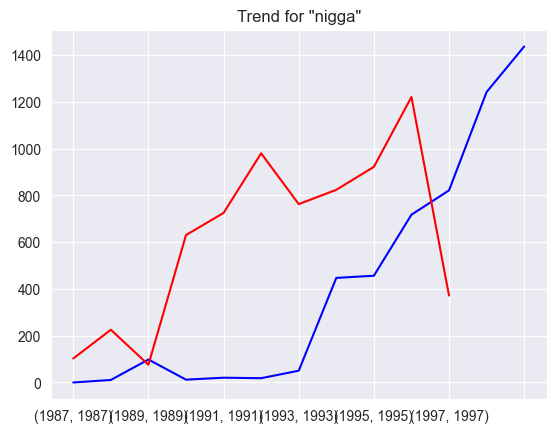

In [27]:
df['tokens'] = df['Lyrics'].apply(tokenize_lyrics)

from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df['Lyrics'] is already cleaned and tokenized
df['tokens'] = df['Lyrics'].apply(tokenize_lyrics)

def get_yearly_frequency(tokens_list, year):
    freq_dict = defaultdict(int)
    for token in tokens_list:
        freq_dict[token] += 1
    return pd.DataFrame.from_dict(freq_dict, orient='index', columns=[year])

# Initialize dictionaries for each coast
yearly_data_east = {}
yearly_data_west = {}

# Group by year and coast
for (year, coast), group in df.groupby(['Release Year', 'Coast']):
    yearly_freq = pd.concat([get_yearly_frequency(row['tokens'], year) for index, row in group.iterrows()])
    yearly_freq = yearly_freq.groupby(yearly_freq.index).sum()
    if coast == 'east_coast':
        yearly_data_east[year] = yearly_freq
    elif coast == 'west_coast':
        yearly_data_west[year] = yearly_freq

# Combine all years into a single DataFrame for each coast
freq_df_east = pd.concat(yearly_data_east, axis=1).fillna(0)
freq_df_west = pd.concat(yearly_data_west, axis=1).fillna(0)

def normalize_frequency(freq_df):
    # Sum the total words for each year and normalize frequencies per 100,000 words
    total_words_per_year = freq_df.sum(axis=0)
    normalized_df = (freq_df.div(total_words_per_year, axis=1) * 100000)  # Normalize per 100,000 words
    return normalized_df

# Calculate frequencies and then normalize them
freq_df_east_normalized = normalize_frequency(freq_df_east)
freq_df_west_normalized = normalize_frequency(freq_df_west)

def plot_word_trends(word, freq_df_east, freq_df_west):
    if word in freq_df_east.index or word in freq_df_west.index:
        ax = freq_df_east.loc[word].plot(kind='line', color='blue', title=f'Trend for "{word}"', label='East Coast')
        freq_df_west.loc[word].plot(ax=ax, kind='line', color='red', label='West Coast')

        # Make sure all_years is a sorted list of unique, flat years suitable for x-ticks
        all_years = sorted(set(freq_df_east.columns.union(freq_df_west.columns)))
        ax.set_xticks(all_years)  # Set x-ticks to these years
        ax.set_xticklabels(all_years, rotation=45)  # Set labels to the same years, rotate for visibility

        plt.xlabel('Year')
        plt.ylabel('Frequency per 100,000 Words')
        plt.legend()
        plt.tight_layout()  # Adjust layout to make room for label rotation
        plt.show()
    else:
        print(f'Word "{word}" not found in the lyrics.')


# Example usage of the function with normalized data
plot_word_trends('nigga', freq_df_east_normalized, freq_df_west_normalized)

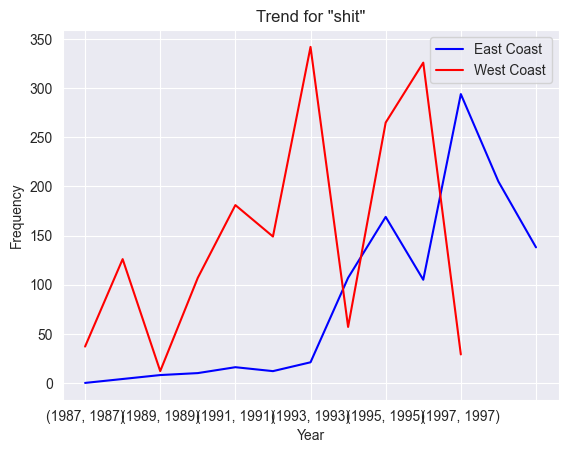

In [13]:
plot_word_trends('shit', freq_df_east, freq_df_west)

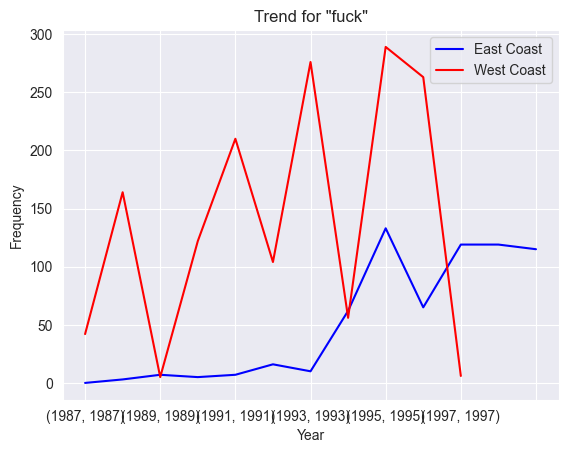

In [14]:
plot_word_trends('fuck', freq_df_east, freq_df_west)

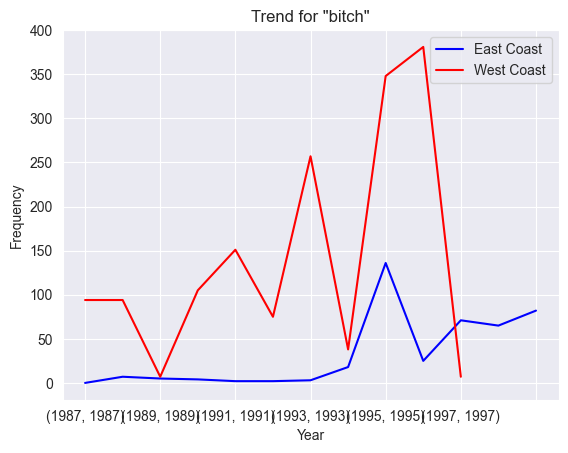

In [15]:
plot_word_trends('bitch', freq_df_east, freq_df_west)

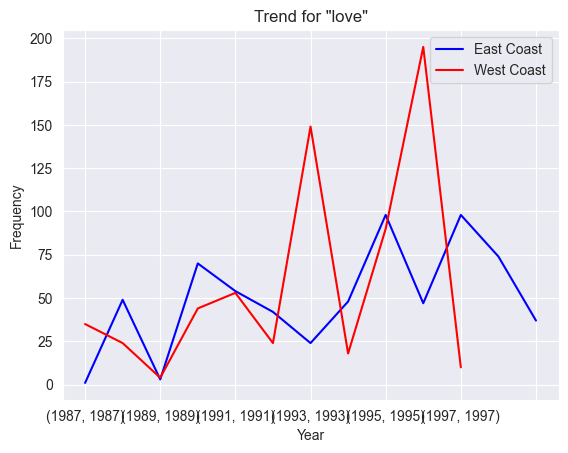

In [16]:
plot_word_trends('love', freq_df_east, freq_df_west)

ValueError: 'locs' must be 1D with shape (M,). Your input has shape (13, 2).

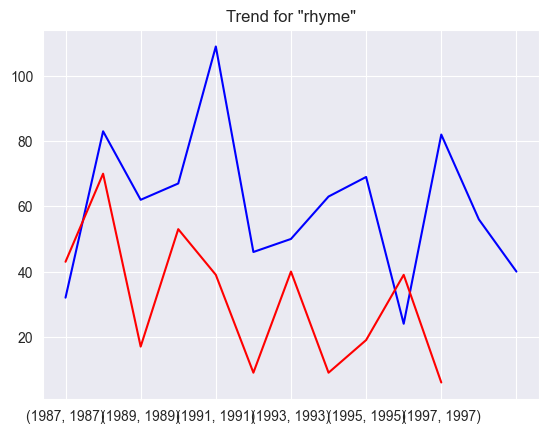

In [22]:
plot_word_trends('rhyme', freq_df_east, freq_df_west)

In [20]:
import spacy

# Load the small English model
nlp = spacy.load('en_core_web_sm')

In [21]:
def extract_entities(lyrics):
    doc = nlp(lyrics)
    entities = []
    for ent in doc.ents:
        entities.append((ent.text, ent.label_))
    return entities

entities = extract_entities(lyrics)
for entity in entities:
    print(entity)


NameError: name 'lyrics' is not defined